In [1]:
%pip install -r requirements.txt
# Clear output
from IPython.display import clear_output
clear_output()

In [2]:
import pandas as pd
import numpy as np
import datetime

data = pd.read_excel('data/base.xlsx')
# Change column names to lowercase and replace spaces with underscores and remove accents
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')
# Convert 'Dia' column to string type
data['dia'] = data['dia'].astype(str)
# Sacar el día de la semana de día, que es la mitad izquierda antes del espacio
data['dia_semana'] = data['dia'].apply(lambda x: x.split(' ')[0])
data['dia_mes'] = data['dia'].apply(lambda x: x.split(' ')[1])
# make 'num_Espera' column with the amount of 'Espera' turned into minutes
data['num_espera'] = data['espera'].apply(lambda x: x.hour * 60 + x.minute + x.second/60)
# make 'num_Duracion' column with the amount of 'Duracion' turned into minutes
data['num_duracion'] = data['duracion'].apply(lambda x: x.hour * 60 + x.minute + x.second/60)
#print amount of 'Espera' min or equal to 00:05:00
print('Porcentaje de clientes que espera menos de 5 minutos: ',data[data['espera'] <= datetime.time(0, 5, 0)].shape[0]/data.shape[0] * 100, '%')
print('Porcentaje de clientes con Estado Atendido',data[data['estado'] == 'Atendido'].shape[0]/data.shape[0] * 100, '%')
data.sample(5)

Porcentaje de clientes que espera menos de 5 minutos:  97.84214170320794 %
Porcentaje de clientes con Estado Atendido 91.2762520193861 %


,mes,dia,cliente,llegada,tiposerv.,servidor,inicio_serv.,fin_serv.,estado,espera,duracion,dia_semana,dia_mes,num_espera,num_duracion
5779,Septiembre,Viernes 30,44,11:51:48,Facturacion,Luisa Diaz,11:53:17,11:59:16,Atendido,00:01:29,00:05:59,Viernes,30,1.483333,5.983333
8292,Noviembre,Martes 27,101,16:29:10,Cancelacion,Maria Tello,16:29:53,16:36:17,Atendido,00:00:43,00:06:24,Martes,27,0.716667,6.400000
7189,Noviembre,Viernes 16,91,18:35:46,Cambio Plan,Dayana Perea,18:36:17,18:38:28,Atendido,00:00:31,00:02:11,Viernes,16,0.516667,2.183333
4013,Septiembre,Miercoles 14,69,19:37:25,Cambio Plan,Dayana Perea,19:39:21,19:43:29,Atendido,00:01:56,00:04:08,Miercoles,14,1.933333,4.133333
2459,Abril,Lunes 27,46,11:58:47,Cambio Plan,Teresa Rodriguez,11:59:54,12:04:53,Atendido,00:01:07,00:04:59,Lunes,27,1.116667,4.983333


cantidad de Tipos de Servicio:  5


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


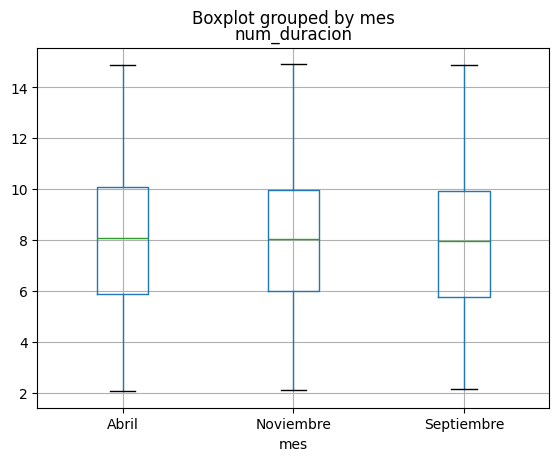

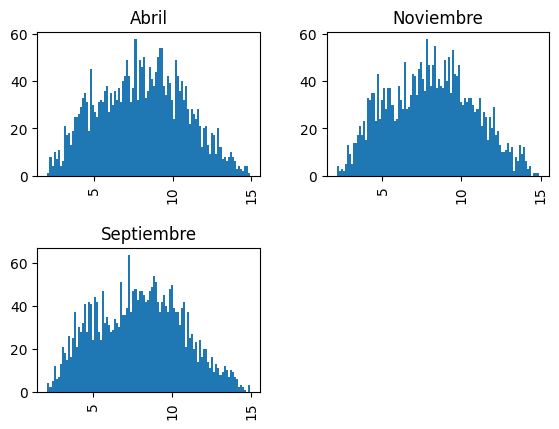

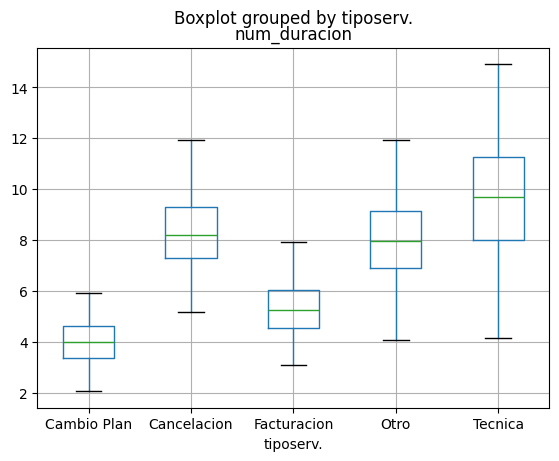

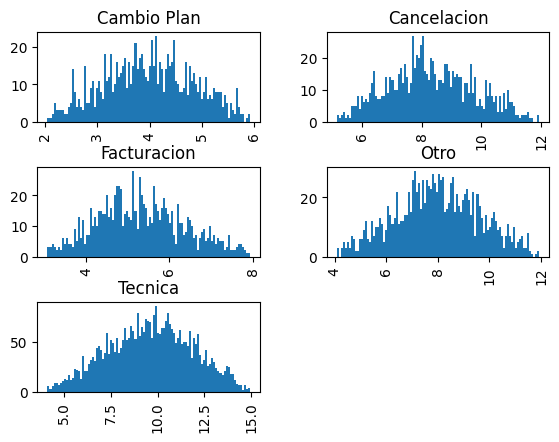

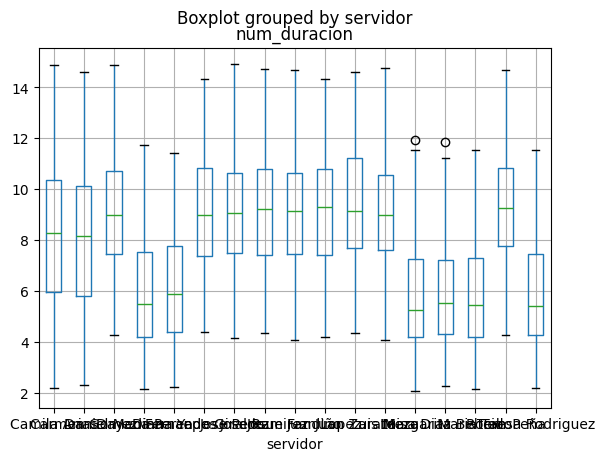

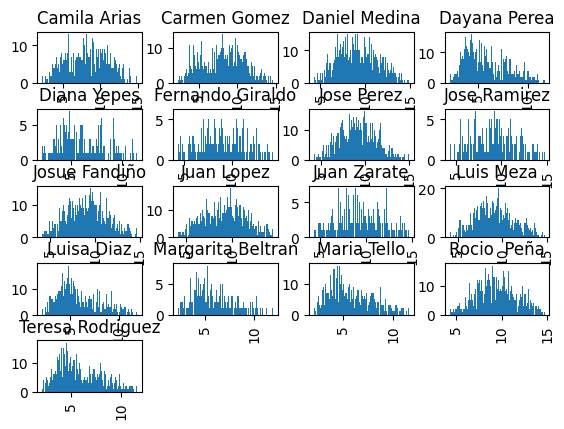

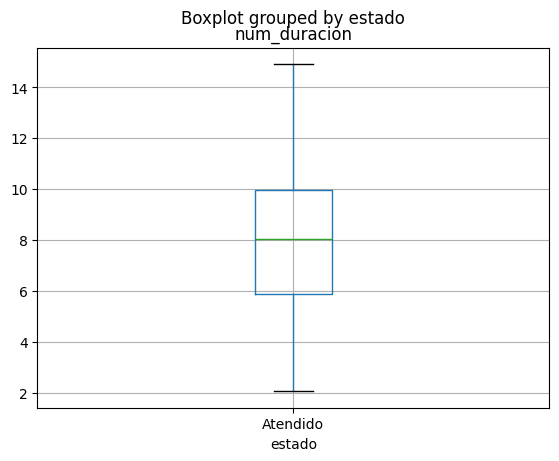

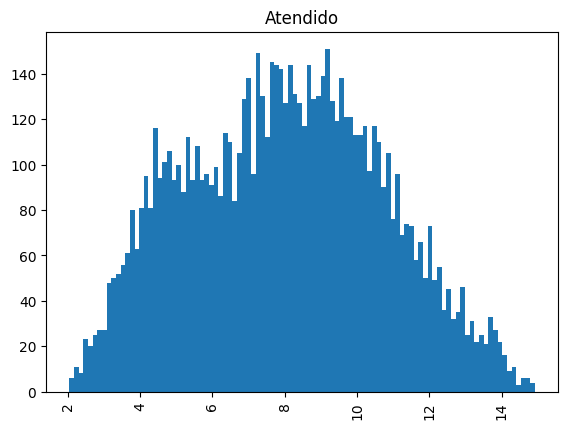

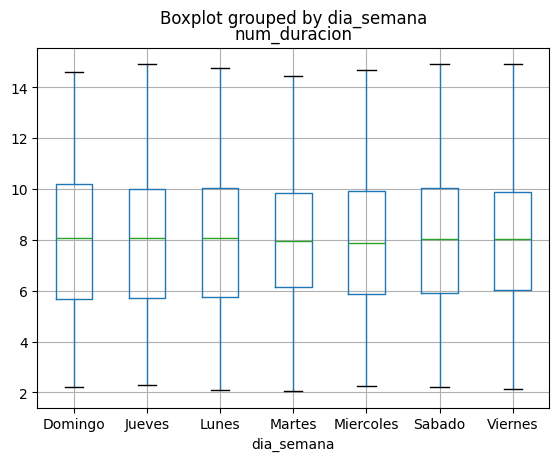

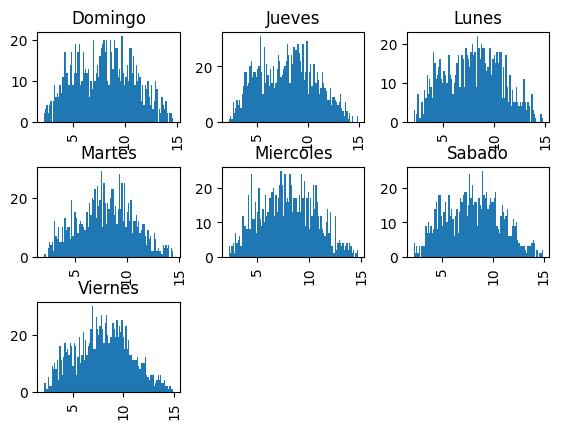

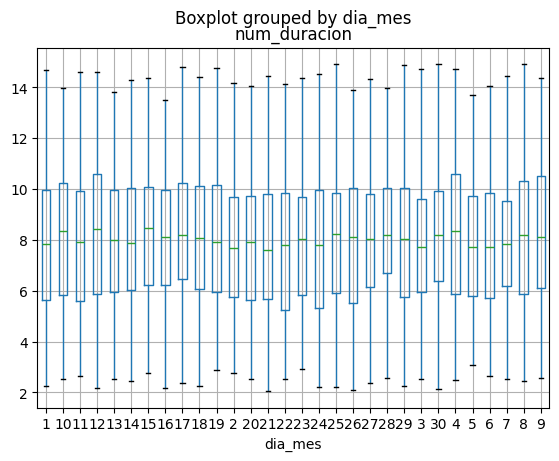

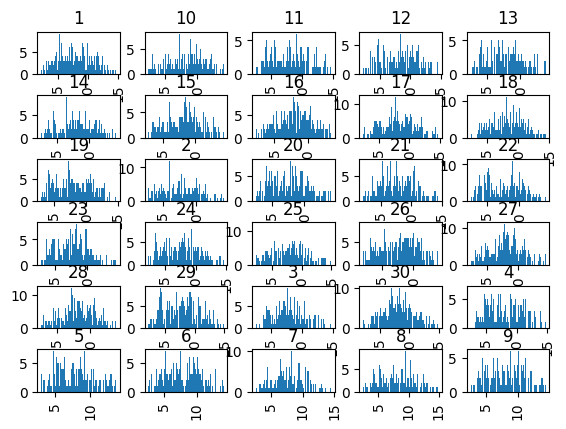

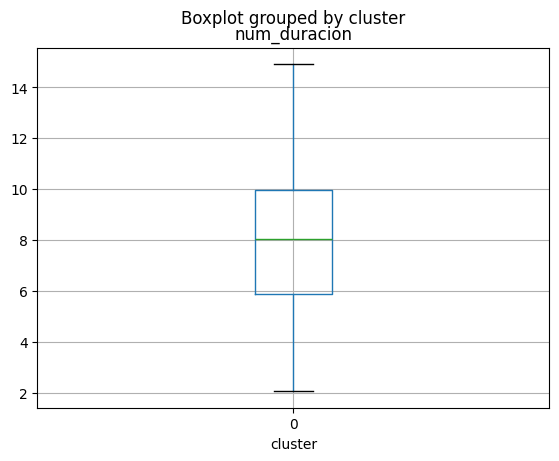

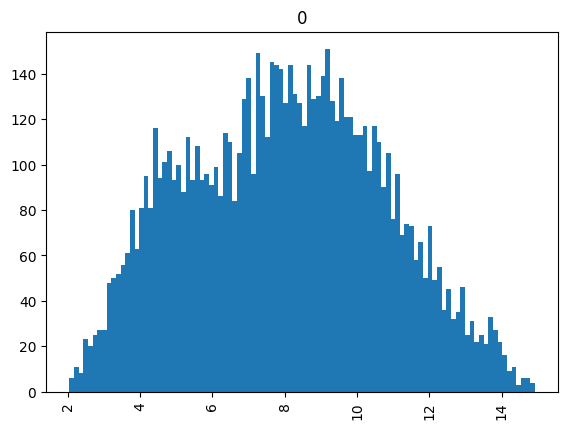

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# get the amount of uniques of TipoServ.
print('cantidad de Tipos de Servicio: ',data['tiposerv.'].nunique())

kmeans = KMeans(n_clusters=6, random_state=0).fit(data[['num_duracion', 'num_espera']])
data['cluster'] = kmeans.labels_

# plot the data to find the best way to separate the data checking boxplot and histogram for each column
for i in data.columns:
    if data[data['estado']=="Atendido"][i].nunique() < 40:
        data[data['estado']=="Atendido"].boxplot(column='num_duracion', by=i)
        plt.show()
        data[data['estado']=="Atendido"].hist(column='num_duracion', by=i, bins=100)
        plt.show()

In [4]:
import distfit
import fitter
#library to wait for a time
import time

# for each tiposerv. find the distribution of the data for num_duracion using distfit and fitter with all the distributions
atend_data = data[data['estado']=="Atendido"]
for i in atend_data['tiposerv.'].unique():
    print('Tipo de Servicio: ', i)
    time.sleep(3)
    dist = distfit.distfit()
    dist.fit_transform(atend_data[atend_data['tiposerv.']==i]['num_duracion'])
    print('distfit: ', dist.summary)
    # f = fitter.Fitter(atend_data[atend_data['tiposerv.']==i]['num_duracion'])
    # f.fit()
    # print('fitter: ', f.summary())
    print('-----------------------------------------------------------------------------------------------------------------')
    



Tipo de Servicio:  Tecnica


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00345426] [loc=9.627 scale=2.241]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.155977] [loc=4.133 scale=5.494]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.155977] [loc=-536870907.867 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 0.0120873] [loc=9.657 scale=1.990]
[distfit] >INFO> [t         ] [0.31 sec] [RSS: 0.00345406] [loc=9.627 scale=2.241]
[distfit] >INFO> [genextreme] [0.14 sec] [RSS: 0.00219241] [loc=8.890 scale=2.279]
[distfit] >INFO> [gamma     ] [0.06 sec] [RSS: 0.00364087] [loc=-73.474 scale=0.061]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.00345441] [loc=-131067.867 scale=131077.494]
[distfit] >INFO> [beta      ] [0.03 sec] [RSS: 0.0018629] [loc=3.562 scale=11.668]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0687459] [loc=4.133 scale=10.783]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.00330486] [loc=-101.254 scale=23.564]


distfit:            name     score               loc          scale  \
0         beta  0.001863          3.561626      11.668207   
1   genextreme  0.002192          8.889928       2.278512   
2     loggamma  0.003305       -101.254431      23.564023   
3            t  0.003454          9.627427       2.240537   
4         norm  0.003454          9.627409       2.240528   
5      lognorm  0.003454    -131067.866667  131077.494056   
6        gamma  0.003641        -73.473976        0.06057   
7     dweibull  0.012087          9.656679       1.989573   
8      uniform  0.068746          4.133333      10.783333   
9        expon  0.155977          4.133333       5.494075   
10      pareto  0.155977 -536870907.866667    536870912.0   

                                         arg  \
0   (2.9729592221391843, 2.7472572119326357)   
1                      (0.3329453362270146,)   
2                      (111.05941416582831,)   
3                      (328102317.43190527,)   
4                

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0117488] [loc=8.327 scale=1.412]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.238958] [loc=5.167 scale=3.160]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.238958] [loc=-268435450.833 scale=268435456.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.0188921] [loc=8.494 scale=1.284]
[distfit] >INFO> [t         ] [0.20 sec] [RSS: 0.0117489] [loc=8.327 scale=1.412]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 0.00898849] [loc=7.810 scale=1.369]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.00974037] [loc=-3.152 scale=0.174]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.00981878] [loc=-9.376 scale=17.646]
[distfit] >INFO> [beta      ] [0.02 sec] [RSS: 0.00837635] [loc=4.987 scale=7.301]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.120974] [loc=5.167 scale=6.767]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 0.0115357] [loc=-361.852 scale=51.588]


distfit:            name     score               loc        scale  \
0         beta  0.008376          4.986926     7.300602   
1   genextreme  0.008988          7.809936     1.368809   
2        gamma   0.00974         -3.152437     0.173961   
3      lognorm  0.009819         -9.375516    17.646298   
4     loggamma  0.011536       -361.852059    51.588111   
5         norm  0.011749          8.326957     1.411637   
6            t  0.011749          8.326961     1.411637   
7     dweibull  0.018892          8.493991     1.283619   
8      uniform  0.120974          5.166667     6.766667   
9        expon  0.238958          5.166667      3.16029   
10      pareto  0.238958 -268435450.833333  268435456.0   

                                         arg  \
0   (2.5645304701140326, 3.0378051432210906)   
1                      (0.2526127311071481,)   
2                        (65.9867871356414,)   
3                     (0.07975914692481954,)   
4                      (1307.695172019656

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00604497] [loc=7.980 scale=1.636]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.215277] [loc=4.083 scale=3.896]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.215277] [loc=-536870907.917 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.0164501] [loc=7.938 scale=1.427]
[distfit] >INFO> [t         ] [0.22 sec] [RSS: 0.00604493] [loc=7.980 scale=1.636]
[distfit] >INFO> [genextreme] [0.04 sec] [RSS: 0.00585835] [loc=7.420 scale=1.644]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 0.006032] [loc=-562.428 scale=0.005]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.00604477] [loc=-59572.414 scale=59580.393]
[distfit] >INFO> [beta      ] [0.02 sec] [RSS: 0.00821711] [loc=3.560 scale=8.789]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.101695] [loc=4.083 scale=7.850]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 0.00615996] [loc=-255.022 scale=40.870]


distfit:            name     score               loc         scale  \
0   genextreme  0.005858          7.419898      1.643924   
1        gamma  0.006032       -562.428375      0.004695   
2      lognorm  0.006045     -59572.413522  59580.393246   
3            t  0.006045          7.979747      1.636452   
4         norm  0.006045          7.979747      1.636449   
5     loggamma   0.00616       -255.021637     40.869565   
6         beta  0.008217          3.560185      8.788888   
7     dweibull   0.01645          7.938379      1.427343   
8      uniform  0.101695          4.083333          7.85   
9       pareto  0.215277 -536870907.916667   536870912.0   
10       expon  0.215277          4.083333      3.896414   

                                        arg  \
0                    (0.30534052094949227,)   
1                     (121497.49261200937,)   
2                   (2.74662425942493e-05,)   
3                     (1203350515.9172769,)   
4                                 

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0185966] [loc=5.323 scale=1.042]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.429613] [loc=3.067 scale=2.257]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.429613] [loc=-268435452.933 scale=268435456.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.0328329] [loc=5.392 scale=0.930]
[distfit] >INFO> [t         ] [0.20 sec] [RSS: 0.0185973] [loc=5.323 scale=1.042]
[distfit] >INFO> [genextreme] [0.04 sec] [RSS: 0.0107653] [loc=4.928 scale=0.992]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.0107774] [loc=-0.289 scale=0.195]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.0113107] [loc=-3.882 scale=9.146]
[distfit] >INFO> [beta      ] [0.02 sec] [RSS: 0.0130829] [loc=2.887 scale=5.514]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.210473] [loc=3.067 scale=4.867]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 0.0185561] [loc=-336.341 scale=45.365]


distfit:            name     score               loc        scale  \
0   genextreme  0.010765           4.92837     0.992183   
1        gamma  0.010777         -0.289077     0.195342   
2      lognorm  0.011311         -3.881703     9.146442   
3         beta  0.013083           2.88747     5.514397   
4     loggamma  0.018556       -336.341037    45.365481   
5         norm  0.018597          5.323486     1.042329   
6            t  0.018597          5.323491     1.042326   
7     dweibull  0.032833          5.391892     0.929826   
8      uniform  0.210473          3.066667     4.866667   
9       pareto  0.429613 -268435452.933333  268435456.0   
10       expon  0.429613          3.066667      2.25682   

                                        arg  \
0                    (0.22296127872792731,)   
1                     (28.731945160160784,)   
2                     (0.1132359899819004,)   
3   (2.5885088043792597, 3.264536523086184)   
4                      (1866.049551397225,)   

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0199207] [loc=3.983 scale=0.848]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.644213] [loc=2.050 scale=1.933]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.644213] [loc=-268435453.950 scale=268435456.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.0414709] [loc=3.975 scale=0.760]
[distfit] >INFO> [t         ] [0.20 sec] [RSS: 0.0199206] [loc=3.983 scale=0.848]
[distfit] >INFO> [genextreme] [0.04 sec] [RSS: 0.0150144] [loc=3.698 scale=0.853]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 0.0199089] [loc=-508.108 scale=0.001]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.0199054] [loc=-442.043 scale=446.025]
[distfit] >INFO> [beta      ] [0.02 sec] [RSS: 0.0123549] [loc=1.961 scale=4.043]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.25661] [loc=2.050 scale=3.867]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 0.0196811] [loc=-147.770 scale=23.004]


distfit:            name     score           loc        scale  \
0         beta  0.012355      1.960526     4.043155   
1   genextreme  0.015014      3.698227     0.852516   
2     loggamma  0.019681    -147.77019    23.003611   
3      lognorm  0.019905   -442.042552   446.024688   
4        gamma  0.019909   -508.107615     0.001403   
5            t  0.019921      3.982941     0.847693   
6         norm  0.019921      3.982941     0.847693   
7     dweibull  0.041471      3.974619     0.760459   
8      uniform   0.25661          2.05     3.866667   
9       pareto  0.644213 -268435453.95  268435456.0   
10       expon  0.644213          2.05     1.932941   

                                        arg  \
0   (2.3077012649134727, 2.305807192114827)   
1                    (0.31838402541072774,)   
2                      (733.3504292102912,)   
3                  (0.0019005482028100794,)   
4                     (364927.73974925256,)   
5                     (45928355212.343185,)   


Tipo de Servicio:  Tecnica
fitter:              sumsquare_error         aic         bic    kl_div  ks_statistic  \
triang             0.027232  530.839668  549.550518  0.015625      0.008922   
gausshyper         0.028557  537.850043  575.271743  0.015729      0.013599   
cosine             0.029396  535.732531  548.206431  0.016651      0.018798   
beta               0.029601  537.685078  562.632878  0.016568      0.014111   
johnsonsb          0.029988  538.851867  563.799667  0.016821      0.013836   

            ks_pvalue  
triang       0.921709  
gausshyper   0.482871  
cosine       0.136731  
beta         0.435409  
johnsonsb    0.460527  
-----------------------------------------------------------------------------------------------------------------
Tipo de Servicio:  Cancelacion
fitter:               sumsquare_error         aic         bic  kl_div  ks_statistic  \
triang              0.227156  436.917903  451.499894     inf      0.019279   
rice                0.253555  445.6

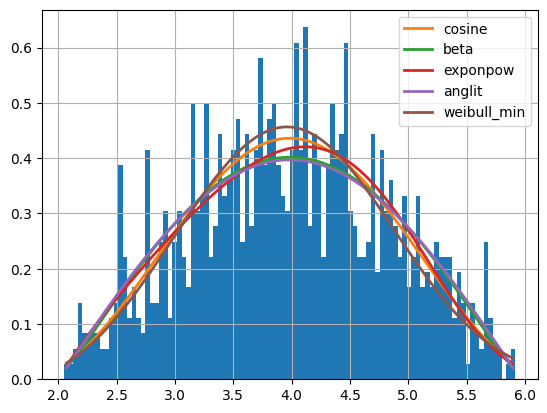

In [5]:
from fitter import Fitter, get_distributions
for i in atend_data['tiposerv.'].unique():
    print('Tipo de Servicio: ', i)
    time.sleep(3)
    # dist = distfit.distfit()
    # dist.fit_transform(atend_data[atend_data['tiposerv.']==i]['num_duracion'])
    # print('distfit: ', dist.summary)
    f = fitter.Fitter(atend_data[atend_data['tiposerv.']==i]['num_duracion'], distributions=get_distributions())
    f.fit()
    print('fitter: ', f.summary())
    print('-----------------------------------------------------------------------------------------------------------------')
 

In [6]:
import os
duration = 1  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

sh: 1: play: not found


32512

In [ ]:
"""
1. para atend_data agrupar por tiposerv.
2. ordenar por 'llegada'
3. sacar la diferencia entre cada uno y el siguiente
4. Graficar boxplot y histograma de la diferencia para cada columna con datos menores a 40
5. Por cada diferencia, encontrar la distribución de probabilidad
"""
data_ = pd.DataFrame()
for i in atend_data['tiposerv.'].unique():
    print('Tipo de Servicio: ', i)
    data_ = atend_data[atend_data['tiposerv.']==i].sort_values(by='llegada')
    data_['Entre_Llegadas'] = data_['llegada'].diff()
    data_['Entre_Llegadas'].dropna(inplace=True)
    data_['Entre_Llegadas'].hist(bins=100)
    plt.show()
    data_['Entre_Llegadas'].plot(kind='box')
    plt.show()
    dist = distfit.distfit()
    dist.fit_transform(data_['Entre_Llegadas'])
    print('distfit: ', dist.summary)
    f = fitter.Fitter(data_['Entre_Llegadas'])
    f.fit()
    print('fitter: ', f.summary())
    print('-----------------------------------------------------------------------------------------------------------------')

os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq)) 
    

